## What is this Notebook about ?

In this notebook, I am trying to understand linear regression and finding the slope of the best fit line using SVD

### Strategy
We will test our understanding on a known data first. For that we will perform the following steps -
* Let's assume a dataset, for which we know the best fit line is of slope 3
* Then we will calculate the same slope using SVD to find out how close we are to the known slope

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

### Linear regression using an one-dimensional data

In this data, we have only two variables - 
* The first data variable : input/independent variable
* The second data variable : output/dependent variable

In [ ]:
x_true_slope = 3   # this is the known slope of our cooked up data

a = np.arange(-2,2,0.25)
a = a.reshape(-1,1)
b = x_true_slope*a + np.random.randn(*a.shape)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plt.subplots_adjust()

ax.plot(a,x_true_slope*a,color='black',linewidth=2,label='True Line')
plt.plot(a,b,marker='x',color='red',markersize=10,label='Noisy Data',linestyle='')

# Performing the SVD
U,S,VT = np.linalg.svd(a,full_matrices=False)  # economy svd
x_tilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b    # Least square fit

ax.plot(a,x_tilde*a,color='blue',linestyle='--',linewidth=3,label='Regression Line')

ax.set_xlabel('a',fontsize=16)
ax.set_ylabel('b',fontsize=16)
ax.tick_params('both',labelsize=16)
ax.grid()
ax.legend(fontsize=18)
slope_best_fit = x_tilde[0,0]
print('Slope of the best fit line = ',round(slope_best_fit,5))
plt.show()

### Linear regression for multi-dimensional data

In this dataset, we have one dependent variable and 4 independent variable

We are trying to fit a linear model using SVD to find out the best fit line

In [ ]:
# Load the dataset
A = np.loadtxt(os.path.join('hald_ingredients.csv'),delimiter=',')
b = np.loadtxt(os.path.join('hald_heat.csv'),delimiter=',')

# Solve Ax=b using SVD
U,S,VT = np.linalg.svd(A,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# Plotting
fig1,ax1 = plt.subplots(1,1,figsize=(8,6))
plt.subplots_adjust()
ax1.plot(b,color='black',label='Heat Data')
ax1.plot(A@x,color='blue',marker='o',label='Regression')

ax1.tick_params('both',labelsize=16)
ax1.legend(fontsize=16)
plt.show()

### Linear regression using a real dataset

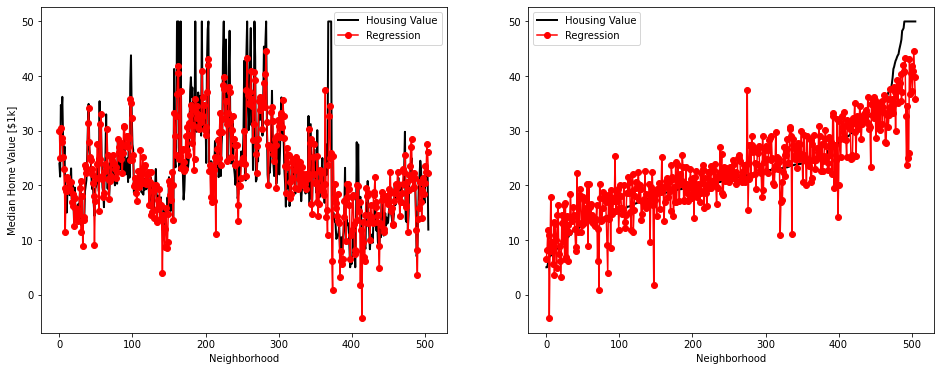

In [11]:
# Load the dataset
H = np.loadtxt('housing.data')
b = H[:,-1]  # housing values in $1000s
A = H[:,:-1]  # other factors

# Pad with ones for non-zero effect - this means the model does not go through the origin in this case
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

# Solve Ax=b using SVD
U,S,VT = np.linalg.svd(A,full_matrices=False)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
ax[0].plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
ax[0].set_xlabel('Neighborhood')
ax[0].set_ylabel('Median Home Value [$1k]')
ax[0].legend()

sort_ind = np.argsort(H[:,-1])
ax[1].plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
ax[1].plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
ax[1].set_xlabel('Neighborhood')
ax[1].legend()
plt.show()